In [94]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial import Delaunay, ConvexHull
import networkx as nx

In [109]:
xl = 2.0
yl = 1.0
N = 1500
t = 3
ini_condns = np.array([np.random.uniform(-xl,xl,N),np.random.uniform(-yl,yl,N)]).T
ini_condns =  np.concatenate((ini_condns,np.array([[-xl,yl],[-xl,-yl],[xl,yl],[xl,-yl]])),axis=0)
ini_condns_arr = ini_condns.flatten()

In [110]:
def fun(t, y):
    #'Function for harmonic oscillator'
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1]
    return res

def fun_d(t, y):
    #Function for Duffing Oscillator
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1] - y[i-1] ** 3
    return res

def PolyArea2D(pts):
    lines = np.hstack([pts,np.roll(pts,-1,axis=0)])
    area = 0.5*abs(sum(x1*y2-x2*y1 for x1,y1,x2,y2 in lines))
    return area


Area at t = 0.0 is 8.0
Area at t = 1.2 is 7.999601252508447
Area at t = 2.4 is 8.0015971696147


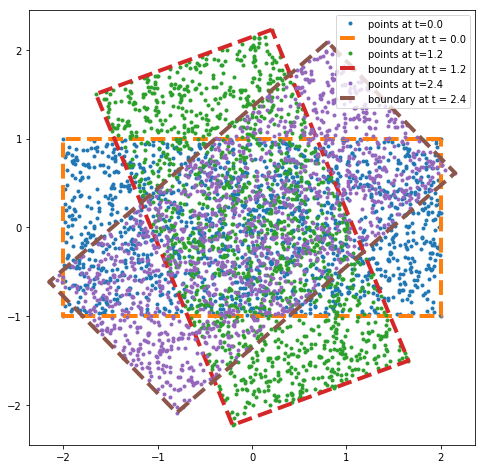

In [112]:
#Harmonic Oscillator
soln = solve_ivp(fun, [0,t], ini_condns_arr,t_eval= t/10*np.linspace(0,8,3))
plt.figure(figsize=(8,8))
points = ini_condns
i=0
for sol in soln.y.T:
    
    points_1 = np.reshape(sol, newshape=(len(ini_condns/2), 2))
    #plt.plot(points_1[:,0],points_1[:,1],'.')
    plt.plot(points_1[:,0],points_1[:,1],'.', label = 'points at t=%s'%soln.t[i])
    hull_1 = ConvexHull(points_1)
    xcoords = np.append(points_1[hull_1.vertices,0],points_1[hull_1.vertices[0],0])
    ycoords = np.append(points_1[hull_1.vertices,1],points_1[hull_1.vertices[0],1])
    plt.plot(xcoords, ycoords, '--', lw=4,label='boundary at t = %s'%soln.t[i])
    plt.legend()
    #plt.plot(points_1[hull_1.vertices[0],0], points_1[hull_1.vertices[0],1], 'ro')
    print('Area at t = %s is %s'%(soln.t[i],PolyArea2D(points_1[hull_1.vertices])))
    i += 1

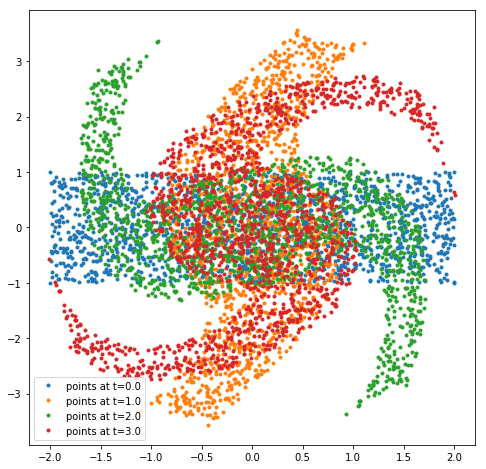

In [114]:
#Duffing Oscillator
soln = solve_ivp(fun_d, [0,t], ini_condns_arr,t_eval= t/10*np.linspace(0,10,4))
plt.figure(figsize=(8,8))
points = ini_condns
i = 0
for sol in soln.y.T:
    points_1 = np.reshape(sol, newshape=(len(ini_condns/2), 2))
    plt.plot(points_1[:,0],points_1[:,1],'.', label = 'points at t=%s'%soln.t[i])
    hull_1 = ConvexHull(points_1,incremental=True)
    xcoords = np.append(points_1[hull_1.vertices,0],points_1[hull_1.vertices[0],0])
    ycoords = np.append(points_1[hull_1.vertices,1],points_1[hull_1.vertices[0],1])
    plt.legend()
    i += 1